**1.  Install Dependencies**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/zoo-animal-classification/class.csv
/kaggle/input/zoo-animal-classification/zoo.csv


**2. Read Input Files using Pandas**

In [2]:
Class=pd.read_csv("/kaggle/input/zoo-animal-classification/class.csv")
Zoo=pd.read_csv("/kaggle/input/zoo-animal-classification/zoo.csv")

In [3]:
Class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
Zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


**3. Data Visualization**

Text(0, 0.5, 'Number_Of_Animal_Species_In_Class')

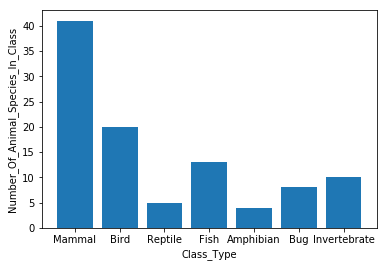

In [5]:
plt.bar(Class['Class_Type'],Class['Number_Of_Animal_Species_In_Class'])
plt.xlabel('Class_Type')
plt.ylabel('Number_Of_Animal_Species_In_Class')

**4. Getting our Training and Testing Data**

In [6]:
Train_Data=Zoo.iloc[0:75,1:18]
Test_Data=Zoo.iloc[75:,1:18]
x_train=Train_Data.iloc[:,0:16]
y_train=Train_Data.iloc[:,16:17]
x_test=Test_Data.iloc[:,0:16]
y_test=Test_Data.iloc[:,16:17]

**6.  Converting Matrix into Numpy Arrays**

In [7]:
X_TRAIN=np.asarray(x_train)
X_TEST=np.asarray(x_test)
Y_TRAIN=np.asarray(y_train)
Y_TEST=np.asarray(y_test)


**7. Training our Sequential Model using Keras**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

* A Sequential Model is used with KERAS
* A Hidden layer of 64 units is taken from tf.keras.layers
* A Softmax layer of 8 units is used

In [8]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8,activation=tf.nn.softmax))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
loss=model.fit(X_TRAIN,Y_TRAIN,epochs=10)

Train on 75 samples
Epoch 1/10
75/75 [==============================] - 1s 13ms/sample - loss: 2.5297 - accuracy: 0.0933
Epoch 2/10
75/75 [==============================] - 0s 104us/sample - loss: 2.4007 - accuracy: 0.1467
Epoch 3/10
75/75 [==============================] - 0s 96us/sample - loss: 2.2748 - accuracy: 0.1733
Epoch 4/10
75/75 [==============================] - 0s 95us/sample - loss: 2.1586 - accuracy: 0.1733
Epoch 5/10
75/75 [==============================] - 0s 91us/sample - loss: 2.0496 - accuracy: 0.2267
Epoch 6/10
75/75 [==============================] - 0s 93us/sample - loss: 1.9431 - accuracy: 0.2667
Epoch 7/10
75/75 [==============================] - 0s 93us/sample - loss: 1.8423 - accuracy: 0.3467
Epoch 8/10
75/75 [==============================] - 0s 89us/sample - loss: 1.7442 - accuracy: 0.3867
Epoch 9/10
75/75 [==============================] - 0s 96us/sample - loss: 1.6480 - accuracy: 0.5733
Epoch 10/10
75/75 [==============================] - 0s 98us/sample - 

In [9]:
val_loss,val_acc=model.evaluate(X_TEST,Y_TEST)

26/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 4ms/sample - loss: 1.6952 - accuracy: 0.5385


**8. Support Vector Machine Classifier**

In [10]:
clf1=svm.SVC(gamma=1,C=1).fit(X_TRAIN,Y_TRAIN)
s=clf1.predict(X_TEST)
print(accuracy_score(Y_TEST,s))
SVM_ACC=clf1.score(X_TEST,Y_TEST)


0.6538461538461539


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**9. Naiver Bayes Classifier **

In [11]:
clf2=GaussianNB().fit(X_TRAIN,Y_TRAIN)
s2=clf2.predict(X_TEST)
print(accuracy_score(Y_TEST,s2))
GNB_ACC=clf2.score(X_TEST,Y_TEST)

0.8846153846153846


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**10. K-Nearest Neighbor Classifier**

In [12]:
clf3=KNeighborsClassifier(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
s3=clf3.predict(X_TEST)
print(accuracy_score(Y_TEST,s2))
KNN_ACC=clf3.score(X_TEST,Y_TEST)

0.8846153846153846


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


**11. Final Result with Comparison**

<BarContainer object of 4 artists>

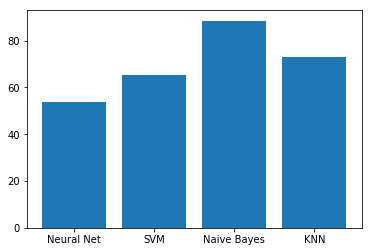

In [13]:
Y=[val_acc*100,SVM_ACC*100,GNB_ACC*100,KNN_ACC*100]
X=['Neural Net','SVM','Naive Bayes','KNN']

plt.bar(X,Y)